In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
data_dir="/Users/gbromley/usgs_wrf_run/"
data = xr.open_dataset(data_dir+"geo_em.d01.nc")

In [3]:
data

<xarray.Dataset>
Dimensions:     (Time: 1, land_cat: 24, month: 12, num_urb_params: 132, soil_cat: 16, south_north: 99, south_north_stag: 100, west_east: 99, west_east_stag: 100)
Dimensions without coordinates: Time, land_cat, month, num_urb_params, soil_cat, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times       (Time) |S19 b'0000-00-00_00:00:00'
    XLAT_M      (Time, south_north, west_east) float32 39.1207 39.1421 ...
    XLONG_M     (Time, south_north, west_east) float32 -115.301 -115.093 ...
    XLAT_V      (Time, south_north_stag, west_east) float32 39.04 39.0614 ...
    XLONG_V     (Time, south_north_stag, west_east) float32 -115.287 ...
    XLAT_U      (Time, south_north, west_east_stag) float32 39.1098 39.1315 ...
    XLONG_U     (Time, south_north, west_east_stag) float32 -115.405 ...
    CLAT        (Time, south_north, west_east) float32 39.1207 39.1421 ...
    CLONG       (Time, south_north, west_east) float32 -115.301 -115.093 ...
    MAPF

In [4]:
test = data['LANDUSEF'].sel(land_cat=4)
fallow = data['LANDUSEF'].sel(land_cat=19)

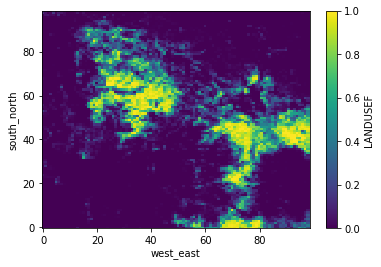

In [5]:
test.plot()

In [6]:
t_sav = test.where(test.values > 0.3)-0.3

In [7]:
t_fal = fallow.where(test.values > 0.3)+0.3

In [8]:
data['LANDUSEF'][0,4,:,:]=t_sav

In [9]:
data['LANDUSEF'][0,19,:,:]=t_fal

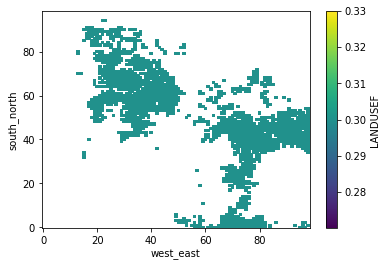

In [11]:
data['LANDUSEF'].sel(land_cat=19).plot()

In [12]:
data.to_netcdf(data_dir+'geo_em.d01_usgs_mod.nc')